# Geographical Original of Music

In [2]:
# all required imports
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import statistics
import math
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

In [3]:
# adding coloumn names
collist = ['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49', 'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56', 'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63', 'col_64', 'col_65', 'col_66', 'col_67',"col_68","latitude" , "longitude"]


data = pd.read_csv("./dataset/default_features_1059_tracks (copy).csv",names = collist) 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 70 columns):
col_1        1059 non-null float64
col_2        1059 non-null float64
col_3        1059 non-null float64
col_4        1059 non-null float64
col_5        1059 non-null float64
col_6        1059 non-null float64
col_7        1059 non-null float64
col_8        1059 non-null float64
col_9        1059 non-null float64
col_10       1059 non-null float64
col_11       1059 non-null float64
col_12       1059 non-null float64
col_13       1059 non-null float64
col_14       1059 non-null float64
col_15       1059 non-null float64
col_16       1059 non-null float64
col_17       1059 non-null float64
col_18       1059 non-null float64
col_19       1059 non-null float64
col_20       1059 non-null float64
col_21       1059 non-null float64
col_22       1059 non-null float64
col_23       1059 non-null float64
col_24       1059 non-null float64
col_25       1059 non-null float64
col_26       1059 

In [5]:

data.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,latitude,longitude
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,-0.105672,1.728885,1.788986,0.849798,-1.109353,0.537904,-0.115368,5.069512,6.007710,0.820869,0.896190,0.131699,0.859286,2.059065,0.266773,1.192932,-1.421091,2.128661,-1.288109,1.458738,-0.734508,-0.092678,-0.571314,-0.142634,2.748619,3.099077,0.317270,-0.130580,2.048282,-0.173489,0.324616,-0.300817,0.471089,-0.538577,-0.979124,-0.679165,0.135963,-1.094049,-0.072197,-0.752002,-0.660715,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,0.389178,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [6]:
data.describe()


,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,latitude,longitude
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,-0.019312,-0.021095,-0.029824,-0.041360,0.025364,0.003521,-0.021183,0.010021,-0.030965,-0.017495,-0.009739,-0.020584,-0.013177,-0.002876,0.005850,-0.011547,0.001516,-0.045074,-0.045770,-0.035677,-0.021926,-0.043428,-0.040145,-0.034628,-0.013943,-0.001377,-0.002940,-0.001075,0.002536,-0.007396,0.007006,0.005717,0.003479,0.002798,-0.061920,-0.056427,-0.021419,-0.017463,-0.008009,-0.016269,-0.012978,0.016907,0.021348,0.030613,0.018534,0.029566,0.026912,0.024524,0.029523,0.032002,0.024929,-0.066779,-0.068595,-0.016383,0.014558,0.006122,-0.012147,-0.003469,0.018174,0.024829,0.025828,0.019925,0.025629,0.021065,0.027439,0.019795,0.023401,0.022533,26.651294,38.405656
std,0.987911,0.986098,0.972813,0.984577,0.999363,1.000305,0.989127,1.007714,1.007447,1.017138,1.021861,1.019824,1.014239,1.009824,1.013566,1.008664,1.004706,0.974172,0.976912,0.978907,0.976634,0.971008,0.976537,0.985923,0.997837,1.005007,1.005078,1.007265,1.003287,1.001275,1.007848,0.994987,1.010523,1.006530,0.906946,0.952494,0.996328,1.005125,1.001176,0.973540,0.982350,1.014465,1.012536,1.013680,1.016112,1.010212,1.012962,1.008261,1.014314,1.013144,1.014117,0.947516,0.960038,0.993703,0.943230,1.023406,0.996403,0.986890,1.006145,1.018136,1.012146,1.009817,1.008802,1.000416,1.000374,1.003078,1.011060,1.007017,18.459432,50.419790
min,-1.529463,-1.476560,-1.133667,-3.222673,-3.386389,-4.366687,-4.291933,-5.287408,-5.281537,-6.856486,-5.689593,-5.088504,-4.009762,-5.703061,-4.168885,-4.237721,-5.465138,-1.297096,-1.354721,-1.107845,-1.572617,-2.046784,-2.496498,-2.449430,-3.092878,-3.200774,-2.872163,-3.242499,-3.213401,-3.068453,-2.589081,-2.516073,-2.511380,-2.430633,-0.983999,-1.413520,-1.935214,-1.602092,-1.894283,-1.856495,-1.572034,-1.545811,-1.557714,-1.441019,-1.400707,-1.621208,-1.461471,-1.259752,-1.311200,-1.376280,-1.375666,-1.023177,-1.789864,-2.678254,-2.462872,-2.535428,-2.208065,-1.702372,-1.466944,-1.665115,-1.597512,-1.579654,-1.614369,-1.505952,-1.404766,-1.248702,-1.221595,-1.329595,-35.300000,-88.760000
25%,-0.607617,-0.621808,-0.599230,-0.640634,-0.599677,-0.633760,-0.608229,-0.556419,-0.513522,-0.464189,-0.534840,-0.453784,-0.544439,-0.544919,-0.533688,-0.516786,-0.543627,-0.629327,-0.563929,-0.732387,-0.681518,-0.721838,-0.765705,-0.742398,-0.646702,-0.631441,-0.625023,-0.575735,-0.593027,-0.609992,-0.606038,-0.604720,-0.604341,-0.610660,-0.602015,-0.877019,-0.716862,-0.727199,-0.710840,-0.661131,-0.776895,-0.712455,-0.683085,-0.636806,-0.657618,-0.654947,-0.645605,-0.627822,-0.624203,-0.649471,-0.650942,-0.684348,-0.692259,-0.612971,-0.295026,-0.671277,-0.721614,-0.733218,-0.711677,-0.727110,-0.668874,-0.680484,-0.692833,-0.660134,-0.69341

In [7]:
statistics.mean(data["col_1"])

-0.019311983947119925

In [8]:
df1 = pd.DataFrame(data.describe())
F= pd.Series(df1['col_1'])

In [9]:
F[1]

-0.019311983947119925

In [10]:
df1

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,latitude,longitude
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,-0.019312,-0.021095,-0.029824,-0.041360,0.025364,0.003521,-0.021183,0.010021,-0.030965,-0.017495,-0.009739,-0.020584,-0.013177,-0.002876,0.005850,-0.011547,0.001516,-0.045074,-0.045770,-0.035677,-0.021926,-0.043428,-0.040145,-0.034628,-0.013943,-0.001377,-0.002940,-0.001075,0.002536,-0.007396,0.007006,0.005717,0.003479,0.002798,-0.061920,-0.056427,-0.021419,-0.017463,-0.008009,-0.016269,-0.012978,0.016907,0.021348,0.030613,0.018534,0.029566,0.026912,0.024524,0.029523,0.032002,0.024929,-0.066779,-0.068595,-0.016383,0.014558,0.006122,-0.012147,-0.003469,0.018174,0.024829,0.025828,0.019925,0.025629,0.021065,0.027439,0.019795,0.023401,0.022533,26.651294,38.405656
std,0.987911,0.986098,0.972813,0.984577,0.999363,1.000305,0.989127,1.007714,1.007447,1.017138,1.021861,1.019824,1.014239,1.009824,1.013566,1.008664,1.004706,0.974172,0.976912,0.978907,0.976634,0.971008,0.976537,0.985923,0.997837,1.005007,1.005078,1.007265,1.003287,1.001275,1.007848,0.994987,1.010523,1.006530,0.906946,0.952494,0.996328,1.005125,1.001176,0.973540,0.982350,1.014465,1.012536,1.013680,1.016112,1.010212,1.012962,1.008261,1.014314,1.013144,1.014117,0.947516,0.960038,0.993703,0.943230,1.023406,0.996403,0.986890,1.006145,1.018136,1.012146,1.009817,1.008802,1.000416,1.000374,1.003078,1.011060,1.007017,18.459432,50.419790
min,-1.529463,-1.476560,-1.133667,-3.222673,-3.386389,-4.366687,-4.291933,-5.287408,-5.281537,-6.856486,-5.689593,-5.088504,-4.009762,-5.703061,-4.168885,-4.237721,-5.465138,-1.297096,-1.354721,-1.107845,-1.572617,-2.046784,-2.496498,-2.449430,-3.092878,-3.200774,-2.872163,-3.242499,-3.213401,-3.068453,-2.589081,-2.516073,-2.511380,-2.430633,-0.983999,-1.413520,-1.935214,-1.602092,-1.894283,-1.856495,-1.572034,-1.545811,-1.557714,-1.441019,-1.400707,-1.621208,-1.461471,-1.259752,-1.311200,-1.376280,-1.375666,-1.023177,-1.789864,-2.678254,-2.462872,-2.535428,-2.208065,-1.702372,-1.466944,-1.665115,-1.597512,-1.579654,-1.614369,-1.505952,-1.404766,-1.248702,-1.221595,-1.329595,-35.300000,-88.760000
25%,-0.607617,-0.621808,-0.599230,-0.640634,-0.599677,-0.633760,-0.608229,-0.556419,-0.513522,-0.464189,-0.534840,-0.453784,-0.544439,-0.544919,-0.533688,-0.516786,-0.543627,-0.629327,-0.563929,-0.732387,-0.681518,-0.721838,-0.765705,-0.742398,-0.646702,-0.631441,-0.625023,-0.575735,-0.593027,-0.609992,-0.606038,-0.604720,-0.604341,-0.610660,-0.602015,-0.877019,-0.716862,-0.727199,-0.710840,-0.661131,-0.776895,-0.712455,-0.683085,-0.636806,-0.657618,-0.654947,-0.645605,-0.627822,-0.624203,-0.649471,-0.650942,-0.684348,-0.692259,-0.612971,-0.295026,-0.671277,-0.721614,-0.733218,-0.711677,-0.727110,-0.668874,-0.680484,-0.692833,-0.660134,-0.69341

In [11]:
df1['col_1']

count    1059.000000
mean       -0.019312
std         0.987911
min        -1.529463
25%        -0.607617
50%        -0.184135
75%         0.312155
max         9.439499
Name: col_1, dtype: float64

In [12]:
df1["col_1"][3]

-1.529463

In [13]:
# data.isnull()

In [14]:
data.isnull().sum()

col_1        0
col_2        0
col_3        0
col_4        0
col_5        0
col_6        0
col_7        0
col_8        0
col_9        0
col_10       0
col_11       0
col_12       0
col_13       0
col_14       0
col_15       0
col_16       0
col_17       0
col_18       0
col_19       0
col_20       0
col_21       0
col_22       0
col_23       0
col_24       0
col_25       0
col_26       0
col_27       0
col_28       0
col_29       0
col_30       0
col_31       0
col_32       0
col_33       0
col_34       0
col_35       0
col_36       0
col_37       0
col_38       0
col_39       0
col_40       0
col_41       0
col_42       0
col_43       0
col_44       0
col_45       0
col_46       0
col_47       0
col_48       0
col_49       0
col_50       0
col_51       0
col_52       0
col_53       0
col_54       0
col_55       0
col_56       0
col_57       0
col_58       0
col_59       0
col_60       0
col_61       0
col_62       0
col_63       0
col_64       0
col_65       0
col_66       0
col_67    

In [15]:
print(data["latitude"].skew())

-0.9910131748760431


In [16]:
print(data["latitude"].kurtosis())

0.6950979804987809


In [17]:
print(data["longitude"].skew())


-0.018651928875215728


In [18]:
print(data["longitude"].kurtosis())

-0.2675089196177822


In [19]:
x = math.cos(data["latitude"][0]) * math.cos(data["longitude"][0])

In [20]:
print(x)

0.6771423300203913


In [21]:
y = math.cos(data["latitude"][0]) * math.sin(data["longitude"][0])

In [22]:
z= math.sin(data["latitude"][0])

In [23]:
print(x,y,z)

0.6771423300203913 -0.734651086348559 0.04202435271884079


In [24]:
x=[]
y=[]
z=[]
for i in range(len(data["latitude"])):
    x.append(math.cos(data["latitude"][i]) * math.cos(data["longitude"][i]))
    y.append(math.cos(data["latitude"][i]) * math.sin(data["longitude"][i]))
    z.append(math.sin(data["latitude"][i]))

In [25]:
print(x)

[0.6771423300203913, 0.03624987415809223, -0.14499152582024838, -0.46657558033328533, -0.7289332649702246, -0.14499152582024838, -0.14499152582024838, -0.06534519155423603, -0.6116220750407203, -0.9092607938267151, -0.9092607938267151, -0.4876619105985057, 0.2161551741784393, 0.38595797780733865, -0.28888734136204947, 0.5164334736363679, 0.5164334736363679, -0.6116220750407203, 0.5164334736363679, 0.5164334736363679, 0.5164334736363679, 0.5164334736363679, 0.5164334736363679, 0.5164334736363679, 0.5164334736363679, 0.5164334736363679, -0.5397840064931458, -0.5397840064931458, -0.46657558033328533, -0.093223001257935, -0.093223001257935, -0.093223001257935, -0.093223001257935, -0.093223001257935, -0.17253936483894558, -0.17253936483894558, -0.17253936483894558, 0.3770763272626959, 0.3770763272626959, 0.3770763272626959, 0.3770763272626959, 0.3770763272626959, 0.5913357422358868, 0.5913357422358868, 0.5913357422358868, -0.009575189117600922, -0.009575189117600922, -0.009575189117600922, 

In [26]:
num_cols = data._get_numeric_data().columns
print("Numerical Columns",num_cols)
cat_cols=list(set(data.columns) - set(num_cols))
print("Categorical Columns:",cat_cols)



Numerical Columns Index(['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8',
       'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15',
       'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22',
       'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29',
       'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36',
       'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43',
       'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49', 'col_50',
       'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56', 'col_57',
       'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63', 'col_64',
       'col_65', 'col_66', 'col_67', 'col_68', 'latitude', 'longitude'],
      dtype='object')
Categorical Columns: []


In [27]:
z_scores = np.abs(stats.zscore(data))

In [28]:
threshold =3

In [29]:
print(np.where(z_scores > 3))

(array([   0,    0,    0,    0,    0,    0,    0,    5,    5,    6,   10,
         10,   10,   10,   12,   12,   14,   14,   14,   14,   14,   14,
         14,   14,   14,   14,   14,   14,   14,   15,   16,   16,   16,
         17,   20,   21,   25,   27,   28,   28,   28,   29,   29,   29,
         29,   29,   34,   34,   34,   34,   34,   34,   35,   35,   36,
         38,   38,   38,   38,   38,   38,   38,   38,   39,   39,   39,
         39,   40,   41,   41,   41,   41,   41,   41,   41,   44,   44,
         44,   48,   49,   49,   49,   49,   49,   49,   49,   49,   49,
         49,   49,   49,   50,   50,   50,   50,   51,   51,   56,   56,
         62,   71,   71,   72,   72,   72,   72,   72,   74,   74,   76,
         76,   77,   89,   89,   93,   93,   93,   93,   93,   97,   97,
         98,   98,   99,  100,  100,  100,  100,  101,  101,  101,  101,
        102,  102,  102,  102,  103,  104,  105,  105,  105,  105,  105,
        105,  105,  105,  105,  106,  109,  109,  

In [30]:
print(z_scores)

[[7.27190269 7.97094317 3.02503881 ... 0.85320243 2.29808416 1.71354259]
 [0.24819123 0.07413895 0.59013731 ... 1.35971354 0.63635985 1.22858327]
 [0.68177324 0.50394622 0.77976897 ... 1.03454651 0.75884834 0.92082062]
 ...
 [0.76262338 0.65896851 0.83364342 ... 0.59247986 0.79556305 0.3691893 ]
 [0.99008434 1.09401811 3.64589432 ... 0.84914596 1.51911229 0.25985518]
 [0.13327236 0.07430534 0.55438797 ... 1.43068828 1.51911229 0.25985518]]


In [31]:
print(z_scores[0][0])

7.271902688787234


Text(0,0.5,'Longitude')

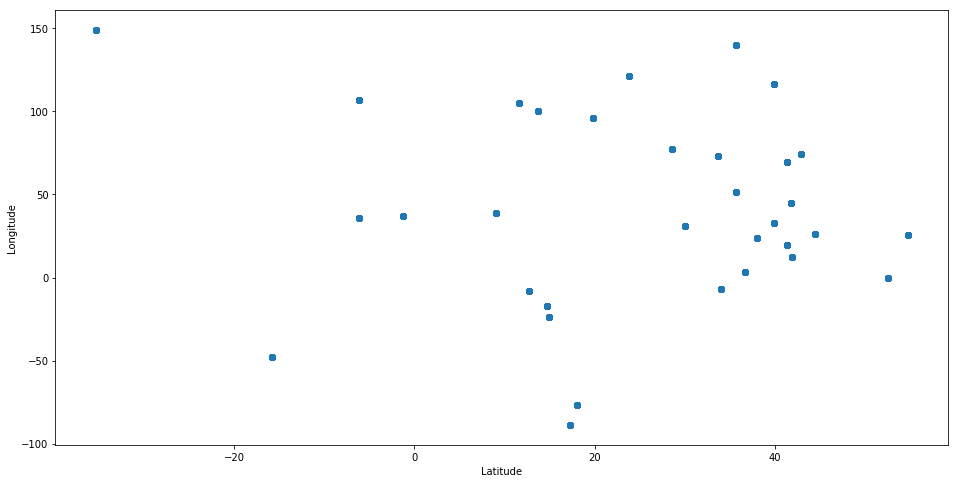

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data["latitude"], data["longitude"])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

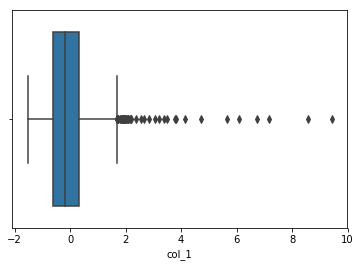

In [33]:
sns.boxplot(x=data["col_1"])

In [34]:
refined_data = data[(z_scores < 3).all(axis=1)]

Text(0,0.5,'Longitude')

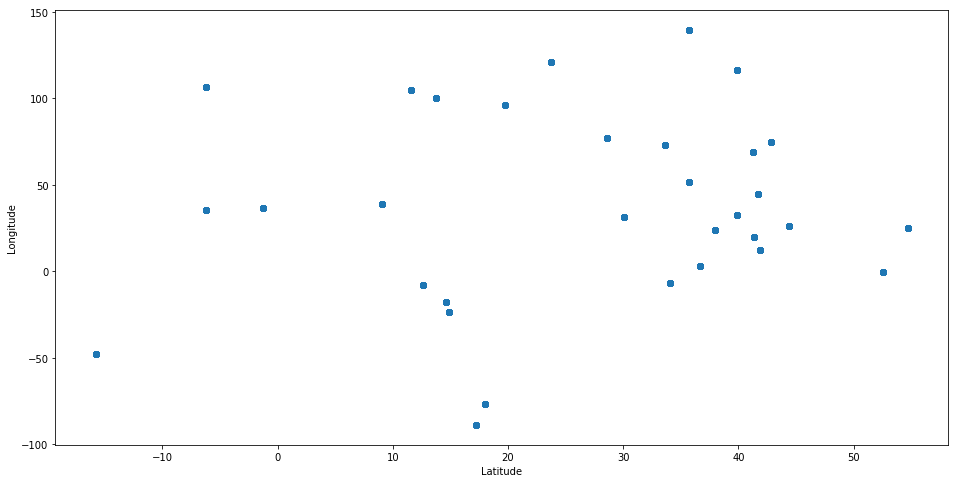

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(refined_data["latitude"], refined_data["longitude"])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

In [36]:
refined_data.shape

(704, 70)

In [37]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

col_1         0.919772
col_2         0.932186
col_3         0.757918
col_4         1.099901
col_5         1.335548
col_6         1.296298
col_7         1.252055
col_8         1.130747
col_9         1.097180
col_10        1.033870
col_11        1.114774
col_12        1.033144
col_13        1.112177
col_14        1.137064
col_15        1.090975
col_16        1.089131
col_17        1.086895
col_18        0.874962
col_19        0.794173
col_20        1.114524
col_21        1.053709
col_22        1.190760
col_23        1.310887
col_24        1.225308
col_25        1.088619
col_26        1.158209
col_27        1.136740
col_28        1.059845
col_29        1.053025
col_30        1.100582
col_31        1.069670
col_32        1.035161
col_33        1.004023
col_34        1.009422
col_35        0.703244
col_36        1.291493
col_37        1.251813
col_38        1.063211
col_39        1.204875
col_40        1.110264
col_41        1.350186
col_42        1.159991
col_43        1.109023
col_44     

In [38]:
print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

      col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  col_10  \
0     False  False  False  False  False  False  False  False  False   False   
1     False  False  False  False  False  False  False  False  False   False   
2     False  False  False  False  False  False  False  False  False   False   
3     False  False  False  False  False  False  False  False  False   False   
4     False  False  False  False  False  False  False  False  False   False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
1054  False  False  False  False  False  False  False  False  False   False   
1055  False  False  False  False  False  False  False  False  False   False   
1056  False  False  False  False  False  False  False  False  False   False   
1057  False  False  False  False  False  False  False  False  False   False   
1058  False  False  False  False  False  False  False  False   True    True   

      col_11  col_12  col_13  col_14  col_15  col_1

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [39]:
data_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [40]:
data_iqr.shape

(368, 70)

Text(0,0.5,'Longitude')

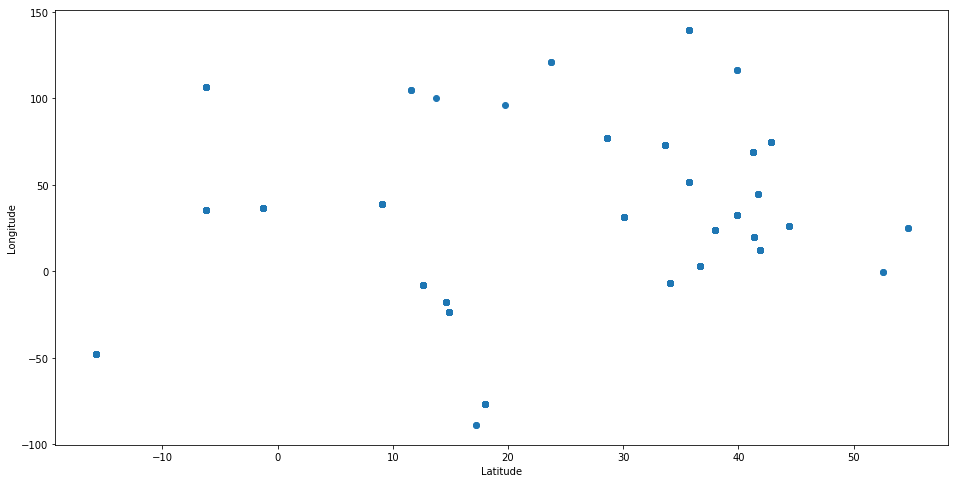

In [41]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_iqr["latitude"], data_iqr["longitude"])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

# Building Model

In [42]:
X = data.iloc[:, 0:68].values
y = data.iloc[:,68:70].values



In [43]:
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [44]:
print(X[0 ,1])
print(y[0 ,0:2])
# print(y)

7.835325
[-15.75 -47.95]


### kmeans


In [45]:
n_clusters = 33
kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y)
labels = kmeans.predict(y)

centroids = kmeans.cluster_centers_
print(centroids)
print(labels)

[[ 5.4680e+01  2.5310e+01]
 [ 2.8610e+01  7.7200e+01]
 [ 1.7980e+01 -7.6800e+01]
 [ 1.2650e+01 -8.0000e+00]
 [ 3.9910e+01  1.1638e+02]
 [-1.2600e+00  3.6800e+01]
 [-3.5300e+01  1.4912e+02]
 [-1.5750e+01 -4.7950e+01]
 [ 3.9910e+01  3.2830e+01]
 [ 4.1900e+01  1.2480e+01]
 [-6.1700e+00  1.0682e+02]
 [ 3.6700e+01  3.2100e+00]
 [ 1.9750e+01  9.6100e+01]
 [ 4.2860e+01  7.4600e+01]
 [ 3.5680e+01  5.1410e+01]
 [ 1.4910e+01 -2.3510e+01]
 [ 5.2500e+01 -1.2000e-01]
 [ 3.5700e+01  1.3971e+02]
 [ 3.8000e+01  2.3710e+01]
 [ 3.4030e+01 -6.8500e+00]
 [ 2.3760e+01  1.2100e+02]
 [ 9.0300e+00  3.8740e+01]
 [ 1.3750e+01  1.0048e+02]
 [ 3.0030e+01  3.1210e+01]
 [ 1.7250e+01 -8.8760e+01]
 [ 4.1710e+01  4.4780e+01]
 [ 3.3660e+01  7.3160e+01]
 [ 4.1260e+01  6.9210e+01]
 [ 1.4660e+01 -1.7410e+01]
 [ 4.4410e+01  2.6100e+01]
 [ 4.1330e+01  1.9800e+01]
 [-6.1700e+00  3.5740e+01]
 [ 1.1550e+01  1.0491e+02]]
[ 7 15  3 ... 30  0  0]


<Figure size 432x288 with 0 Axes>

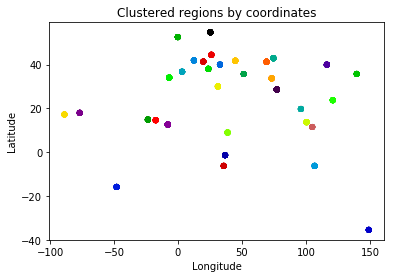

<Figure size 432x288 with 0 Axes>

In [46]:
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in labels]
plt.scatter(y[:, 1], y[:, 0], c = label_color, s=25)
plt.title("Clustered regions by coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

In [47]:
print(y)

[[-15.75 -47.95]
 [ 14.91 -23.51]
 [ 12.65  -8.  ]
 ...
 [ 41.33  19.8 ]
 [ 54.68  25.31]
 [ 54.68  25.31]]


In [48]:
from sklearn.cluster import DBSCAN
plt.rcParams["figure.figsize"] = (20,5)

dbs = DBSCAN(eps=3, min_samples=2).fit(y)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
dbs_labels = dbs.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(n_clusters)

33


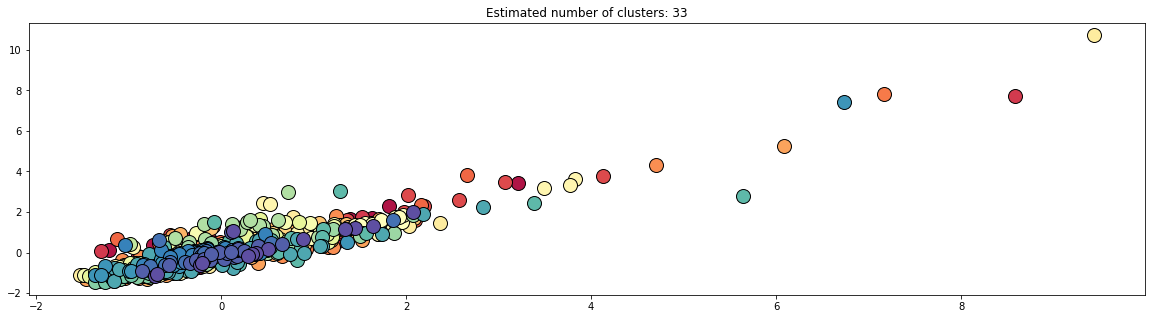

In [49]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors=5)
# classifier.fit(y_train)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [51]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    kmeans = KMeans(n_clusters=i, max_iter = 500, algorithm='full')
    kmeans = kmeans.fit(y)
    labels = kmeans.predict(y)
#     error.append(np.mean(labels != ))

In [53]:
# plt.figure(figsize=(12, 6))
# plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10)
# plt.title('Error Rate K Value')
# plt.xlabel('K Value')
# plt.ylabel('Mean Error')

In [54]:
# scores = cross_val_score(estimator_iter, Xtrain, ytrain, cv = 2, scoring='accuracy')

In [55]:
y = labels


In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [57]:


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

X_scaler = StandardScaler().fit(X)


scaled_Xtrain = X_scaler.transform(Xtrain)
scaler = StandardScaler()
scaled_Xtest = X_scaler.transform(Xtest)


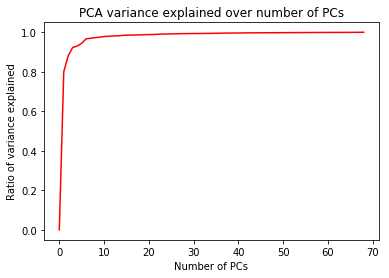

In [58]:
PCA_var = PCA(n_components = X_scaler.transform(X).shape[1])
PCA_var.fit(X_scaler.transform(X))
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

PCA_var_exp.insert(0, 0)

plt.figure()
plt.title("PCA variance explained over number of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Ratio of variance explained")
plt.plot(range(0, len(PCA_var_exp), 1), PCA_var_exp, c = 'r')
plt.show()

In [1]:

estimators = {}

estimators['svc'] = SVC
estimators['rfc'] = RandomForestClassifier
estimators['logreg'] = LogisticRegression

params = {}
params['svc'] = {'kernel': ['linear'], 'C': [10**x for x in range(-1, 3, 1)], 
                 'gamma': [10**x for x in range(-1, 2, 1)], 
                'random_state': [1234]}
params['rfc'] = {'n_estimators': [5*x for x in range(3, 5, 1)]}

params['logreg'] = {'C': [10**x for x in range(-1, 3, 1)], 'penalty': ['l1', 'l2']}

rfe_best_model = {}
pca_best_model = {}
                          

for i, estimator in enumerate(estimators):
    model_params = ParameterGrid(params[estimator])
    grid = model_params
    
    rfe_best_model[estimator] = []
    pca_best_model[estimator] = []
    
    for n_comps in range(1, scaled_Xtrain.shape[1], 1):
        rfe_best_model[estimator].append(0)
        pca_best_model[estimator].append(0)
            
        for params_combo in grid:
        
            estimator_iter = estimators[estimator]
            estimator_iter = estimator_iter(**params_combo)

            rfe = RFE(estimator = estimator_iter, n_features_to_select=n_comps)
            rfe.fit(scaled_Xtrain, ytrain)

            if (rfe.score(scaled_Xtest, ytest) > rfe_best_model[estimator][n_comps - 1]):
                rfe_best_model[estimator][n_comps - 1] = rfe.score(scaled_Xtest, ytest)
                
            PCA_model = PCA(n_components = n_comps)
            PCA_model.fit(scaled_Xtrain)
            PCA_Xtrain = PCA_model.transform(scaled_Xtrain)
            PCA_Xtest = PCA_model.transform(scaled_Xtest)
            
            estimator_iter.fit(PCA_Xtrain, ytrain)
            
            if (estimator_iter.score(PCA_Xtest, ytest) > pca_best_model[estimator][n_comps - 1]):
                pca_best_model[estimator][n_comps - 1] = estimator_iter.score(PCA_Xtest, ytest)

    plt.figure()
    plt.xlabel("%s - Number of features selected" % estimator)
    plt.ylabel("Accuracy score")
    plt.plot(range(1, len(pca_best_model[estimator]) + 1, 1), pca_best_model[estimator], c = 'r')
    plt.plot(range(1, len(rfe_best_model[estimator]) + 1, 1), rfe_best_model[estimator], c = 'b')
    plt.show()

NameError: name 'SVC' is not defined

In [54]:
from factor_analyzer import FactorAnalyzer

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [53]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value


(72515.77977696687, 0.0)

In [56]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)

In [57]:
kmo_model

0.8459453048166119

In [68]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation = None)
fa.fit(data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.36258838e+01, 8.22204602e+00, 5.27837864e+00, 4.76511139e+00,
       3.82522255e+00, 2.25865127e+00, 2.09229418e+00, 1.88262351e+00,
       1.74342556e+00, 1.50868204e+00, 1.44949100e+00, 1.38462291e+00,
       1.28803940e+00, 1.13335549e+00, 1.06631135e+00, 1.02801330e+00,
       9.96573177e-01, 9.39349955e-01, 8.71328501e-01, 8.30013163e-01,
       8.02289360e-01, 7.22333745e-01, 6.81309575e-01, 6.34292405e-01,
       6.23728638e-01, 6.14341678e-01, 5.56909176e-01, 5.31183987e-01,
       4.91717242e-01, 4.79448420e-01, 4.66109328e-01, 4.45179733e-01,
       4.34794269e-01, 4.18255142e-01, 4.00343898e-01, 3.91472324e-01,
       3.53597676e-01, 3.30179732e-01, 3.07156780e-01, 2.81201535e-01,
       2.78421455e-01, 2.68934131e-01, 2.38136285e-01, 2.18036150e-01,
       2.06483747e-01, 1.99360806e-01, 1.89320320e-01, 1.82388199e-01,
       1.74789068e-01, 1.72827112e-01, 1.59052114e-01, 1.47622610e-01,
       1.39079328e-01, 1.37532711e-01, 1.24018972e-01, 1.11992953e-01,
      

In [86]:



# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer( n_factors=25,rotation = None)
fa.fit(data)
       

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.36258838e+01, 8.22204602e+00, 5.27837864e+00, 4.76511139e+00,
       3.82522255e+00, 2.25865127e+00, 2.09229418e+00, 1.88262351e+00,
       1.74342556e+00, 1.50868204e+00, 1.44949100e+00, 1.38462291e+00,
       1.28803940e+00, 1.13335549e+00, 1.06631135e+00, 1.02801330e+00,
       9.96573177e-01, 9.39349955e-01, 8.71328501e-01, 8.30013163e-01,
       8.02289360e-01, 7.22333745e-01, 6.81309575e-01, 6.34292405e-01,
       6.23728638e-01, 6.14341678e-01, 5.56909176e-01, 5.31183987e-01,
       4.91717242e-01, 4.79448420e-01, 4.66109328e-01, 4.45179733e-01,
       4.34794269e-01, 4.18255142e-01, 4.00343898e-01, 3.91472324e-01,
       3.53597676e-01, 3.30179732e-01, 3.07156780e-01, 2.81201535e-01,
       2.78421455e-01, 2.68934131e-01, 2.38136285e-01, 2.18036150e-01,
       2.06483747e-01, 1.99360806e-01, 1.89320320e-01, 1.82388199e-01,
       1.74789068e-01, 1.72827112e-01, 1.59052114e-01, 1.47622610e-01,
       1.39079328e-01, 1.37532711e-01, 1.24018972e-01, 1.11992953e-01,
      

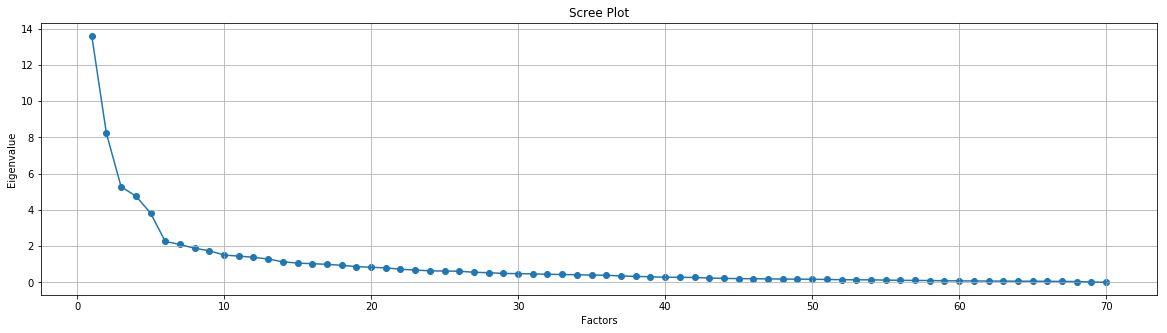

In [87]:
df = data
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [89]:

fa = FactorAnalyzer(n_factors = 20,rotation = "varimax")
fa.fit(data)
       


FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=20, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [90]:
fa.loadings_


array([[ 0.06505965,  0.04117887,  0.92692402, ..., -0.01647619,
         0.01230794, -0.03777602],
       [ 0.13313337, -0.00242404,  0.8739116 , ...,  0.00254712,
         0.01563727, -0.04777566],
       [-0.05886434, -0.0603135 ,  0.43946956, ..., -0.04171689,
         0.0469853 ,  0.01040763],
       ...,
       [ 0.71957725,  0.16471878,  0.04262757, ..., -0.16551766,
         0.0449383 ,  0.14599808],
       [ 0.06272728, -0.2099095 ,  0.02357905, ...,  0.03585952,
        -0.30868216,  0.01536613],
       [ 0.16822675, -0.07118192, -0.01151133, ..., -0.05305358,
         0.10416589, -0.0167443 ]])

In [91]:
fa.get_factor_variance()

(array([10.12349779,  6.81482942,  4.15173952,  4.01396982,  3.59214371,
         2.77448439,  2.30357873,  2.20358073,  1.9236967 ,  1.4619134 ,
         1.31011914,  1.27127092,  1.26187223,  1.22255357,  1.20315725,
         1.1366622 ,  0.85873171,  0.84581145,  0.71359602,  0.6083262 ]),
 array([0.1446214 , 0.09735471, 0.05931056, 0.05734243, 0.05131634,
        0.03963549, 0.03290827, 0.03147972, 0.02748138, 0.02088448,
        0.01871599, 0.01816101, 0.01802675, 0.01746505, 0.01718796,
        0.01623803, 0.0122676 , 0.01208302, 0.01019423, 0.00869037]),
 array([0.1446214 , 0.2419761 , 0.30128667, 0.35862909, 0.40994543,
        0.44958092, 0.48248919, 0.51396892, 0.5414503 , 0.56233477,
        0.58105076, 0.59921178, 0.61723852, 0.63470357, 0.65189153,
        0.66812956, 0.68039716, 0.69248018, 0.70267441, 0.71136478]))

Pearson Correlation Test


In [28]:
from sklearn.model_selection import train_test_split
data = data.drop(data.index[1])
X = data.iloc[:, 0:68].values
y = data.iloc[:,68:70].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [29]:
# X_train.shape
# X_test.shape

(529, 68)

In [30]:
# X_test.shape

(529, 68)

In [32]:
# sample1 = data.iloc[:529 , :]
# sample2 = data.iloc[529:1058 , :]

In [54]:
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

SyntaxError: invalid syntax (<ipython-input-54-d11762485fd0>, line 1)

In [33]:
from scipy.stats import pearsonr

corr , p = pearsonr(sample1 ,sample2)

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [37]:
sample1 = data.sample(frac=0.5, replace=True, random_state=1)

In [39]:
sample1

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,latitude,longitude
236,0.777402,1.748812,0.882737,-0.992794,1.277168,-1.139772,0.020013,-0.933435,-0.103815,-0.740283,-0.210262,0.483463,0.052285,-0.887990,-1.393496,-1.564519,0.433065,0.670860,0.927334,0.288301,-0.368261,-0.624709,-0.539225,-0.290387,-0.273885,-0.400874,-0.818107,0.159099,0.620671,-0.174219,-0.276147,0.215150,-0.140946,0.730118,0.729384,1.756854,1.499048,2.406385,2.021511,0.276659,-0.910938,-0.060209,0.059228,-0.127905,-0.224995,-0.098872,1.683297,1.496208,0.327709,0.775947,0.366691,0.150036,0.391447,0.528156,0.235242,0.179488,0.611749,0.042387,0.650730,0.876510,0.281419,1.147174,1.871771,1.513287,0.701395,0.717167,0.513037,2.019720,35.68,51.41
906,0.290637,-0.111742,-0.286614,0.895232,0.770147,-0.612639,0.662430,0.457432,-0.194517,0.181112,-0.484210,-0.047597,0.509601,-0.073044,-0.634741,-0.997157,-1.721644,0.829633,0.730994,0.089450,-0.076078,0.145129,0.624731,0.996233,2.894475,1.906182,1.517882,2.089785,1.258379,2.308353,1.081144,0.720916,0.694733,1.486885,-0.106472,-0.673462,-0.894974,-0.982493,-0.944394,-1.037123,-0.548267,0.609420,0.190320,-0.368397,0.247183,0.271418,-0.106921,-0.606512,-0.761274,0.147347,0.600879,0.540286,0.200866,0.111662,-0.152023,-0.660628,0.028045,0.302519,0.383643,0.303344,-0.244527,-0.383397,0.112283,-0.015096,-0.654418,-0.224764,-0.159895,-0.143766,30.03,31.21
716,-0.512592,-0.413843,1.296832,0.420225,0.816392,-0.363365,-0.087708,0.541790,1.328097,-0.709249,0.383280,0.309064,0.356889,-0.657307,0.593581,0.789063,-0.151498,0.100869,0.341032,2.101537,0.988101,1.099318,0.744950,1.681038,3.366256,1.423191,1.523196,1.158145,1.018892,0.318661,0.250523,-0.566676,-0.109688,-0.077060,-0.333988,0.276963,1.448986,-0.570548,0.137708,-0.132419,1.083702,1.483466,-0.426225,0.370356,0.170293,-0.398182,-0.692071,-0.420827,-0.859445,-0.617905,-1.009791,-0.674052,0.359636,0.786295,-0.514477,0.093904,-0.600330,0.768559,1.887385,-0.032819,0.058997,1.001907,1.037965,0.124266,-0.074856,-0.944486,-0.576892,-0.800656,17.98,-76.80
848,0.817380,0.687904,-0.281365,0.228754,-0.046975,-0.478829,-1.479232,-0.632015,-0.763081,1.670291,-1.247062,-1.084831,1.193065,-1.324375,2.232193,-2.168818,0.023136,0.797172,0.513946,-0.502736,-0.579275,-0.189169,0.098742,0.417122,1.217002,-0.009975,0.594208,-0.313137,-0.530983,0.115076,0.363112,0.212739,0.991786,0.812218,0.844784,0.096888,-0.669696,0.316395,0.697790,0.258639,1.560789,2.549408,1.776444,1.070232,0.095152,0.068712,-0.250376,0.705313,0.473843,1.556675,1.288702,2.419668,1.707714,-0.398488,-0.147665,-0.156246,1.741566,3.268906,3.021100,1.573009,3.227687,1.128276,1.240516,1.265131,1.215394,1.771184,2.246101,1.714337,41.26,69.21
961,0.107645,0.032628,0.881832,0.086421,-0.459441,-0.119054,0.950076,0.056024,1.516232,0.244653,0.597290,0.396405,0.303823,-0.872203,0.450125,1.500976,1.062421,0.882375,0.691630,1.013967,0.085582,1.735128,0.453580,0.208516,0.307237,1.826711,0.987336,1.129058,-0.046991,-0.046483,1.746444,0.564006,-0.078652,0.015232,0.474299,0.470343,1.799094,-0.922803,0.950353,-0.070401,0.800251,0.294116,1.892724,-0.300122,-0.381914,0.501050,-0.524678,-0.519076,-0.565418,-0.668083,-0.497079,0.822883,0.537052,1.730420,0.499454,1.622872,0.450347,-0.318094,0.154853,1.007668,-0.641300,-0.414910,-0.405870,-0.879969,0.644062,-0.223226,-0.726001,1.022058,-6.17,35.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [41]:
sample2 = data.sample(frac=0.5, replace=True, random_state=2)
    

In [42]:
sample2

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,latitude,longitude
528,1.971478,1.852672,0.114868,-2.128631,1.383371,-1.942733,-1.166165,-0.583136,0.086737,-0.456135,1.072471,1.955320,-1.628647,1.693055,-0.499142,0.826097,-0.638142,-0.800494,-1.083758,-0.929769,-1.374248,-2.032595,-2.209477,-2.224103,-2.775004,-2.764700,-2.668840,-2.597818,-3.187695,-2.733006,-2.355326,-2.372069,-1.690082,-2.430633,-0.437608,-1.090569,-1.405999,0.231483,-1.442683,-0.869532,-0.912822,-1.015433,-0.772494,0.222115,1.092883,0.420770,0.915228,1.473140,0.859520,1.676205,0.331810,-0.502453,-1.604425,-1.648591,0.289895,-0.967244,-1.788484,-0.070705,-1.088687,-1.125665,0.379634,1.243272,-0.227234,0.551619,0.683077,0.471045,1.082594,-0.319764,52.50,-0.12
494,-1.054812,-0.627387,-0.629182,0.487155,-2.853925,1.498330,2.720127,1.079154,0.927500,-0.075188,0.012888,0.645454,0.009745,-0.852555,-0.590467,-0.477457,-1.105335,-0.975468,-0.462861,-0.489813,0.835143,3.250693,1.178944,0.671322,0.073689,2.003224,1.705442,2.993511,2.401897,1.141949,1.479547,1.917996,0.718782,0.433647,-0.745705,0.415649,0.612946,0.172354,1.419148,0.657241,0.122131,0.021833,0.433495,0.207593,0.782144,0.426923,0.333836,0.210531,0.663593,0.520578,0.193017,-0.616559,0.557619,1.242447,0.099112,1.040429,2.052021,0.296095,0.156809,1.130169,0.322838,2.671673,2.066886,1.096452,0.932369,0.861555,0.517866,-0.016556,19.75,96.10
300,-0.110811,0.150935,-0.343829,-1.258538,0.684837,-0.143813,0.942083,-0.841811,0.450895,-0.531485,-1.520448,-0.068816,-0.671624,0.568795,0.797815,-0.232906,-0.522702,-0.296461,-0.036553,-0.563141,-0.644401,-0.206344,-0.143194,-0.408310,-0.077485,-0.407911,-0.132113,-1.083607,-0.830726,-0.941532,-0.373891,-0.475801,-0.349114,-0.124348,-0.196909,0.672244,0.459904,0.247177,0.423767,0.088750,-0.963359,-0.399307,-0.599811,-0.776721,-0.687810,-0.498565,-0.809942,-0.610374,-0.147463,-0.172426,-0.664872,-0.444314,0.371784,-0.308719,0.714713,0.897407,2.610442,-0.320541,0.178768,-0.464895,0.350955,-0.557290,-0.862749,-0.889976,-0.707421,-0.252907,0.017561,0.731146,36.70,3.21
467,1.281460,3.033564,1.292394,-2.832952,2.045556,-0.825136,-1.334685,-0.107590,-0.341191,-0.522376,0.829726,-0.009237,0.350025,0.450672,-0.336340,-0.282544,-0.866584,0.475909,0.248900,-0.366348,-1.185396,-0.255643,-1.202657,-1.398508,-0.732543,-1.096254,-1.261716,-1.363983,-0.897807,-1.530686,-1.143958,-1.295870,-0.787607,-0.171312,1.136693,2.929392,2.900977,4.059769,3.500219,0.898165,0.410452,0.206498,-0.441681,-0.445841,0.003983,0.960602,-0.467240,0.074522,-0.840970,0.133659,-0.050971,0.199199,0.186741,0.280873,1.032572,1.688524,0.531416,0.912711,1.381600,1.364192,1.761110,1.500088,2.982041,1.368463,1.560788,1.065947,2.011951,2.143273,33.66,73.16
361,0.501673,0.090778,-0.434125,-0.089518,0.413421,-0.057273,1.083543,-0.477645,0.016734,0.538376,0.429951,-0.744132,-0.453378,0.317939,-0.366591,-0.227147,-0.545851,1.422950,0.997188,-0.350254,-0.953036,0.252801,0.280858,0.780502,0.545422,0.697246,0.752646,1.335780,1.035331,0.538751,0.320428,0.002789,0.298755,0.405369,1.280663,0.527216,0.055519,-0.005595,0.306191,-0.356589,-0.065974,-0.092938,0.138145,-0.064642,0.183823,0.111723,-0.568690,-0.013317,-0.476068,-0.471958,-0.162849,2.156725,1.589512,-0.307662,-0.195276,-0.778698,1.036400,0.962049,-0.295109,-0.153911,0.419233,0.397689,-0.248025,-0.840503,-0.374725,-0.473734,-0.642471,-0.160523,12.65,-8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [47]:
corr , p = pearsonr(sample1["col_1"] ,sample2["col_2"])

In [51]:
corr

0.12543305771345825

T-Test

In [62]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(sample1, sample2)
if p.all() > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Probably the same distribution


array([4.36432593e-01, 1.83770223e-01, 7.43080046e-01, 1.26047592e-01,
       1.36816025e-01, 7.19921367e-01, 5.34852677e-01, 1.75264677e-01,
       1.14920614e-01, 2.97635579e-01, 3.01363342e-01, 1.84805637e-02,
       1.69445407e-01, 4.04042791e-01, 8.36041663e-01, 8.65267498e-01,
       2.23570686e-01, 8.58218588e-01, 4.84472235e-01, 3.90333699e-01,
       8.96486758e-01, 9.34502405e-01, 7.70397954e-01, 9.35244269e-01,
       1.85198741e-01, 1.31053797e-01, 7.40871220e-01, 2.25771310e-01,
       8.27921179e-02, 1.21165278e-01, 1.33224309e-01, 5.71952029e-01,
       8.68311739e-01, 9.91516007e-01, 3.23237074e-01, 2.86596133e-01,
       3.71644642e-01, 3.97666756e-01, 4.63177135e-01, 9.91994362e-01,
       7.40571517e-01, 5.47869052e-02, 3.26149308e-03, 3.84610202e-01,
       3.62967180e-01, 5.18902309e-04, 1.03426699e-01, 1.33003935e-01,
       7.22146043e-01, 9.26855494e-01, 9.51507115e-01, 4.09141705e-01,
       9.60569497e-01, 1.90838588e-02, 5.28124723e-01, 8.18387275e-01,
      

In [53]:
stat

array([-0.77852736, -1.33010697,  0.32786326,  1.53108618, -1.48888576,
        0.3586597 ,  0.62081902, -1.35639112, -1.57775841, -1.04203149,
       -1.03402045, -2.35950482,  1.37492802, -0.83475798,  0.20701038,
       -0.16971409,  1.21780351, -0.17868594, -0.69937418,  0.85936592,
        0.13013202,  0.08220106, -0.29192939, -0.08126794,  1.32578167,
        1.51113277,  0.33078671,  1.21203183,  1.73635844,  1.55115038,
        1.50266544,  0.56535557, -0.16584365,  0.01063583,  0.98828991,
       -1.06615752,  0.89377742, -0.84613926, -0.73389255, -0.01003612,
        0.3311836 ,  1.92269648,  2.94869194,  0.86979482,  0.91011949,
        3.48155421,  1.62987236,  1.50352024,  0.35568697,  0.09182374,
       -0.06082874,  0.82573365,  0.04945067,  2.34749753, -0.63108009,
       -0.22967696, -0.76121962,  0.39331661,  1.60561979,  1.76936373,
        0.26562705,  0.05972767,  1.3307078 ,  0.5421684 ,  0.76076984,
       -0.10673344, -0.64968473, -0.24460673, -0.58945859,  0.98

In [61]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(sample1, sample2)
if p.all() > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Probably the same distribution


In [57]:
stat

array([-0.81759503, -1.43067466,  0.33807051,  1.60514208, -1.4394016 ,
        0.36021406,  0.61230554, -1.38819941, -1.52139884, -1.07213195,
       -1.03423785, -2.28571758,  1.38193849, -0.8680079 ,  0.20685611,
       -0.17627167,  1.21762226, -0.18894667, -0.73794308,  0.85643488,
        0.13190559,  0.08025151, -0.29641267, -0.08174976,  1.33794218,
        1.54206001,  0.33678882,  1.25818858,  1.7750618 ,  1.52613923,
        1.50840611,  0.57788014, -0.1699193 ,  0.01107407,  1.03060438,
       -1.07146037,  0.90366792, -0.82355266, -0.74577108, -0.00986201,
        0.33404668,  1.88675788,  2.95904968,  0.87866717,  0.92592492,
        3.49410012,  1.6684935 ,  1.52118735,  0.35759674,  0.09103393,
       -0.06238339,  0.83761112,  0.04862552,  2.35257005, -0.63021455,
       -0.22632581, -0.75131262,  0.40158866,  1.56962442,  1.78638715,
        0.27393678,  0.0623681 ,  1.35140484,  0.53805683,  0.76267008,
       -0.10998248, -0.65264261, -0.25502094, -0.60040074,  0.99

In [58]:
p

array([4.13957249e-01, 1.53115016e-01, 7.35444431e-01, 1.09060448e-01,
       1.50629345e-01, 7.18831108e-01, 5.40599222e-01, 1.65661756e-01,
       1.28758402e-01, 2.84150559e-01, 3.01498440e-01, 2.26661732e-02,
       1.67574961e-01, 3.85784345e-01, 8.36201978e-01, 8.60148104e-01,
       2.23911431e-01, 8.50207216e-01, 4.60876879e-01, 3.92145789e-01,
       8.95109216e-01, 9.36067629e-01, 7.67031501e-01, 9.34876684e-01,
       1.81491226e-01, 1.23658102e-01, 7.36409921e-01, 2.08879660e-01,
       7.64637112e-02, 1.27573960e-01, 1.32048731e-01, 5.63591404e-01,
       8.65138684e-01, 9.91168537e-01, 3.03198232e-01, 2.84451988e-01,
       3.66583613e-01, 4.10565607e-01, 4.56137590e-01, 9.92135111e-01,
       7.38476967e-01, 5.97412928e-02, 3.22435326e-03, 3.79981444e-01,
       3.54908008e-01, 5.15616540e-04, 9.58106420e-02, 1.28811445e-01,
       7.20788016e-01, 9.27500156e-01, 9.50281127e-01, 4.02628127e-01,
       9.61236122e-01, 1.90102445e-02, 5.28826861e-01, 8.21035615e-01,
      

Analysis of Variance Test (ANOVA)

In [65]:
from scipy.stats import f_oneway
stat, p = f_oneway(sample1, sample2)
# print('stat=%.3f, p=%.3f' % (stat, p))
if p.all() > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Probably the same distribution


Test for Equal variances

In [68]:
from scipy.stats import levene

levene(sample1["col_1"],sample2["col_1"])

LeveneResult(statistic=0.5959234159241504, pvalue=0.4403103858136771)

Homoscedasticity (equal variance) of residuals

In [73]:
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict(X)
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

AttributeError: 'LinearRegression' object has no attribute 'resid'